In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation

%matplotlib inline
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def rotate(angle):
    ax.view_init(azim=angle)

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Principal Component Analysis

Principal component analysis (PCA) is a method to evaluate an orthonormal basis for a set of training data.  The bases are ranked by the respective variances of the variables in those bases.  Bases that give rise to larger variances yield more information about the underlying distributions.  

In this notebook, we will explore two relatively straight forward examples of PCA. We will illustrate how to perform this using scikit-learn and also how to do the analysis using Python's linear algebra tools.

The first example will be a trivial example to illustrate the basics of PCA.  We will have linear random data in two dimensions and the 3rd dimension will just be one minus the values in the 2nd dimension.  IE, 100% correlation between the 2nd and 3rd variables.  The PCA process should build a 2D space that comprises the full variance.

The second example will reproduce Figure 53 from the Mehta et. al. course text.  This will be 30 classes in 40 dimensional space of normal distributions, so a bit more challenging than our simple example.

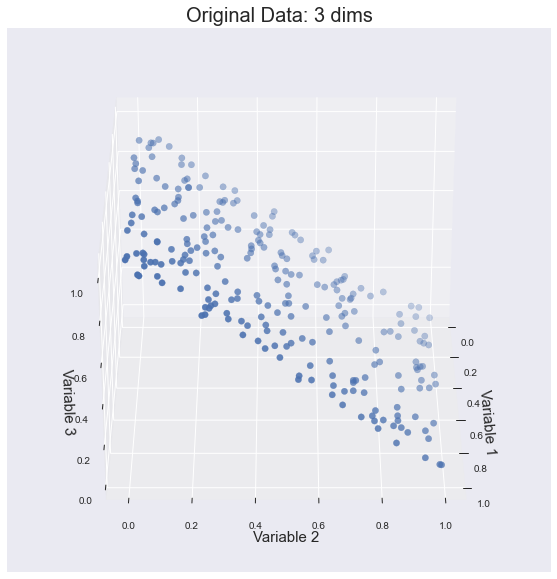

In [2]:
# Simple data!
np.random.seed(1311122)

N = 250 # number of points
D = 3 # dimensionality
K = 1 # classes

# data shapes, keep targets to observed PCA effects
Xsimple = np.zeros((N*K,D))

# make multidimensional normal distributions
for j in range(K):
    ix = range(N*j,N*(j+1))
    xx = np.random.rand(N)
    yy = np.random.rand(N)
    zz = 1-yy
    Xsimple[ix] = np.c_[xx,yy,zz]

#It's a plane!
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Variable 1', fontsize = 15)
ax.set_ylabel('Variable 2', fontsize = 15)
ax.set_zlabel('Variable 3', fontsize = 15)
ax.set_title('Original Data: 3 dims', fontsize = 20)
ax.scatter(Xsimple[:, 0], Xsimple[:, 1], Xsimple[:, 2], s=40, cmap=cm.plasma)
ax.azim = 0
plt.show()

(250, 3)
Variance associated with each component: 
 [1.78541683e-01 8.88235782e-02 6.27972032e-33]

Fraction of total variance: 
 [6.67781903e-01 3.32218097e-01 2.34874205e-32]


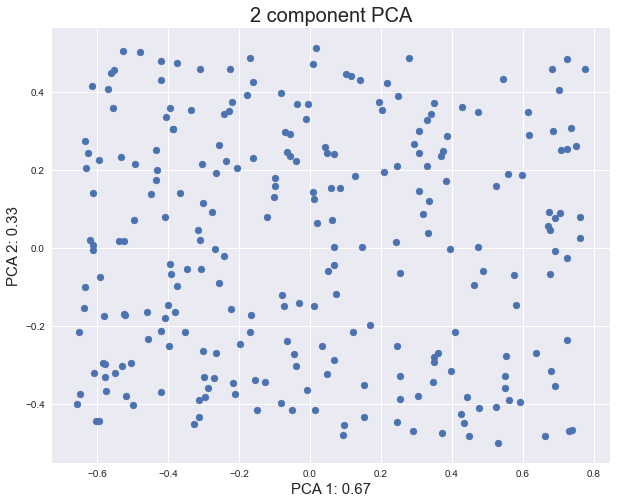

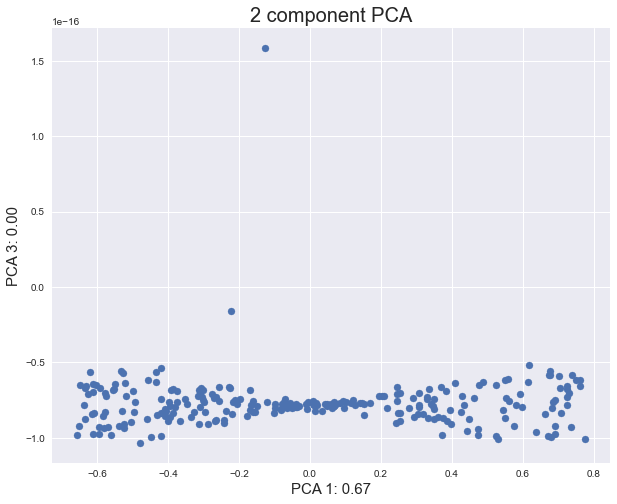

In [3]:
from sklearn.decomposition import PCA

# very simple interface for scikit-learn!
pca = PCA(n_components=D)
principalComponents = pca.fit_transform(Xsimple)

#print some info about our data
print(principalComponents.shape)
print("Variance associated with each component: \n",pca.explained_variance_)
print("\nFraction of total variance: \n",pca.explained_variance_ratio_)

#plots!!
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(('PCA 1: %.2f'%pca.explained_variance_ratio_[0]), fontsize = 15)
ax.set_ylabel(('PCA 2: %.2f'%pca.explained_variance_ratio_[1]), fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalComponents[:,0],principalComponents[:,1],cmap=cm.plasma)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(('PCA 1: %.2f'%pca.explained_variance_ratio_[0]), fontsize = 15)
ax.set_ylabel(('PCA 3: %.2f'%pca.explained_variance_ratio_[2]), fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalComponents[:,0],principalComponents[:,2],cmap=cm.plasma)
plt.show()

***
***
***
# And now for the more complicated example

We will make 30 classes that populate 40 dimensions. Each class will be given a random mean value from which a normal distribution is drawn.  We can explore having zero correlation between the dimensions and also non-zero correlation.

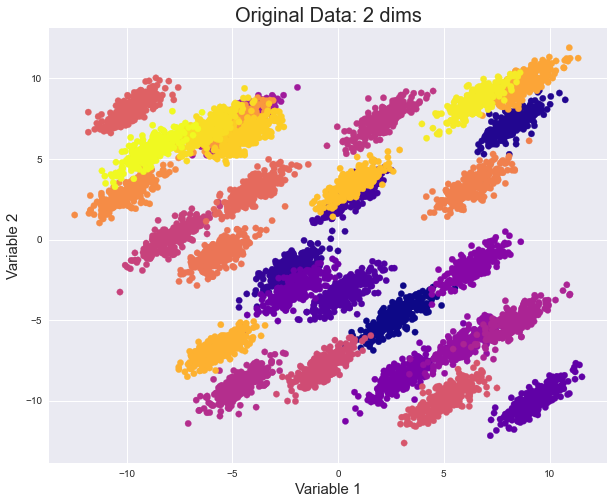

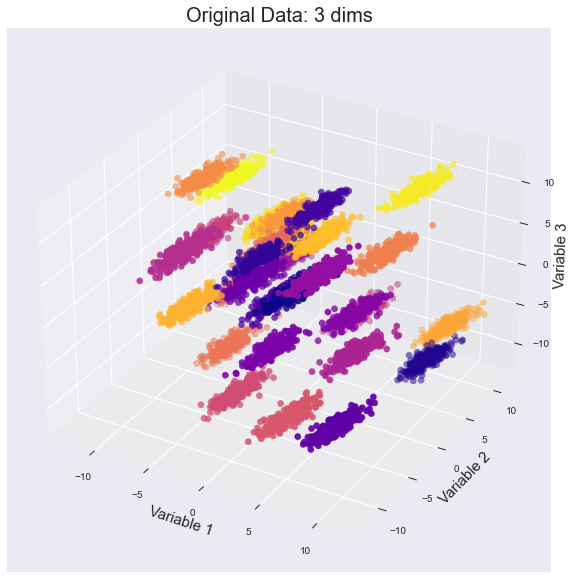

In [4]:
#would you like to make rotating 3D gif files??
makeMovies = False

N = 250 # number of points per class
K = 30 # number of classes
D = 40 # dimensionality

# data shapes, keep targets to observed PCA effects
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')

#specify a covariance matrix
#default is diagonal = no covariance
var = 1.0
cov = np.eye(D)
cov *= var

#We can also introduce some covariance
# this is done randomly, but you could choose otherwise
if True:
    for d in range(D):
        covRow = np.random.rand(D)*var
        covRow = np.roll(covRow,d-np.argmax(covRow))
        cov[d,:] = covRow

# The previous step did not make a symmetric
# matrix, but LinAlg 101 taught us how to fix that!
cov = np.matmul(cov,cov.T)
argMax = np.argmax(cov)
# Divide by the largest entry to avoid huge variances
cov /= cov[np.int(argMax/D),np.mod(argMax,D)]

# make multidimensional normal distributions
for j in range(K):
    ix = range(N*j,N*(j+1))
    y[ix] = j
    means = np.random.rand(D)*20-10
    X[ix] = np.random.multivariate_normal(means,cov,N)

# plots!!
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Variable 1', fontsize = 15)
ax.set_ylabel('Variable 2', fontsize = 15)
ax.set_title('Original Data: 2 dims', fontsize = 20)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=cm.plasma)
plt.show()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Variable 1', fontsize = 15)
ax.set_ylabel('Variable 2', fontsize = 15)
ax.set_zlabel('Variable 3', fontsize = 15)
ax.set_title('Original Data: 3 dims', fontsize = 20)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=40, cmap=cm.plasma)

if makeMovies:
    print("Making animation 0:")
    rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
    writergif = animation.PillowWriter(fps=20) #gif
#    writervideo = animation.FFMpegWriter(fps=60) #mp4, avi or mov
    rot_animation.save('origRotation.gif', dpi=80,writer = writergif)

plt.show()

***
***
***
# PCA Analysis 1: scikit-learn

(7500, 40)
Variance associated with each component: 
 [1.47832243e+02 1.39693672e+02 1.11183302e+02 1.01331468e+02
 9.73298914e+01 8.08947346e+01 7.74979964e+01 7.34446827e+01
 6.75486278e+01 5.79801945e+01 5.49122435e+01 4.94159204e+01
 4.53274350e+01 4.46705133e+01 3.26851311e+01 2.66309090e+01
 2.49423705e+01 2.34947164e+01 2.32813700e+01 1.65547533e+01
 1.62453089e+01 1.28620620e+01 1.14884387e+01 9.76304207e+00
 7.89812522e+00 6.43296025e+00 4.35768551e+00 3.00514524e+00
 2.41289496e+00 1.87323615e+00 4.16023962e-01 3.29260965e-01
 2.68552367e-01 2.50771561e-01 1.87643558e-01 1.63489968e-01
 1.18451189e-01 9.43388783e-02 8.72476902e-02 4.75189798e-02]

Fraction of total variance: 
 [1.07517927e-01 1.01598769e-01 8.08632668e-02 7.36980587e-02
 7.07877245e-02 5.88344866e-02 5.63640495e-02 5.34160872e-02
 4.91279049e-02 4.21688135e-02 3.99375023e-02 3.59400438e-02
 3.29665012e-02 3.24887241e-02 2.37717933e-02 1.93685765e-02
 1.81405078e-02 1.70876335e-02 1.69324673e-02 1.20402201e-02

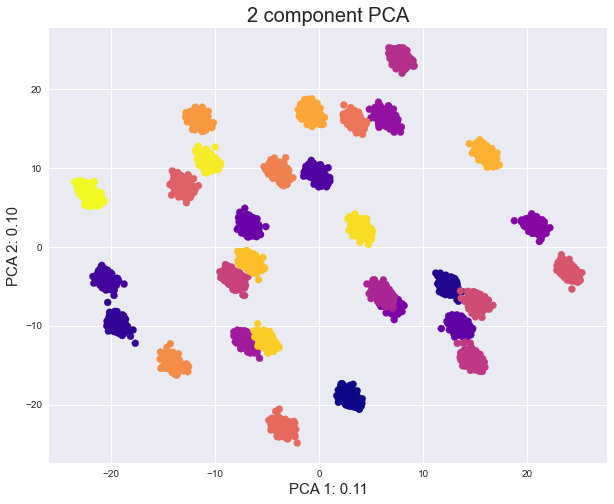

In [5]:
#Let's start with scikit-learn again
pca = PCA(n_components=D)
principalComponents = pca.fit_transform(X)

#print some info about our data
print(principalComponents.shape)
print("Variance associated with each component: \n",pca.explained_variance_)
print("\nFraction of total variance: \n",pca.explained_variance_ratio_)

N90 = 0
sum = 0
for idx in range(pca.explained_variance_ratio_.size):
    sum+=pca.explained_variance_ratio_[idx]
    if sum >= 0.95:
        N95 = idx
        break

# more reporting!
print("\n {} components contain 95% of variance".format(N95))

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(('PCA 1: %.2f'%pca.explained_variance_ratio_[0]), fontsize = 15)
ax.set_ylabel(('PCA 2: %.2f'%pca.explained_variance_ratio_[1]), fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalComponents[:,0],principalComponents[:,1],c=y,cmap=cm.plasma)
plt.show()

***
***
***

# Now let's do this ourselves!

We just need to calculate the covariance matrix and then find the eigen vectors.  Turns out this is easy to do using Numpy.

In [6]:
# Covariance matrix calculated from our data
cov = X.T.dot(X)
print("Covariance Matrix shape: ",cov.shape)

# Calculate eigenvalues and their associated eigen vectors
EigValues, EigVectors = np.linalg.eig(cov)

#Reorder all of our eigen vectors!
permute = np.argsort(-1*EigValues)
EigValues = EigValues[permute]
EigVectors = EigVectors[permute]

EigValues /= np.sum(EigValues)
print("\nFraction of total variance: \n",EigValues)
#print(EigVectors)

N90 = 0
sum = 0
for idx in range(EigValues.size):
    sum+=EigValues[idx]
    if sum >= 0.95:
        N95 = idx
        break

# more reporting!
print("\n {} components contain 95% of variance".format(N95))

# Create Z features from X features by taking dot product with eigen vectors
Z = X.dot(EigVectors)

Covariance Matrix shape:  (40, 40)

Fraction of total variance: 
 [1.03038263e-01 9.76073911e-02 7.85928589e-02 7.50534990e-02
 7.00029261e-02 6.18326999e-02 5.42163256e-02 5.10993780e-02
 4.82080254e-02 4.43372931e-02 3.97908039e-02 3.69792622e-02
 3.21665634e-02 3.11765237e-02 2.89516416e-02 2.26123759e-02
 1.82026528e-02 1.66099094e-02 1.62455741e-02 1.22319002e-02
 1.13383205e-02 1.04165835e-02 8.62011527e-03 7.38448022e-03
 6.35346439e-03 4.65642143e-03 3.94431448e-03 2.42000383e-03
 1.98093453e-03 1.53764168e-03 1.18943006e-03 2.62403261e-04
 2.27871352e-04 1.86619324e-04 1.63061566e-04 1.14203793e-04
 8.30076631e-05 6.70793360e-05 6.51009206e-05 3.30757114e-05]

 20 components contain 95% of variance


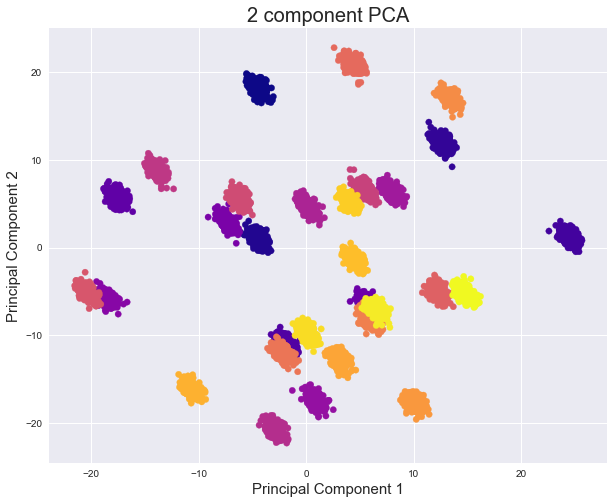

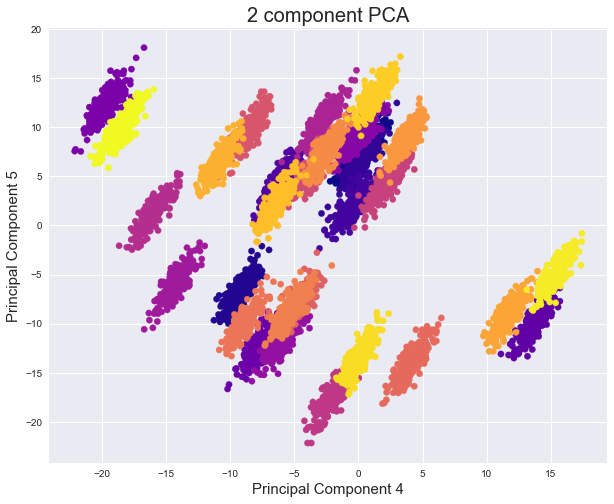

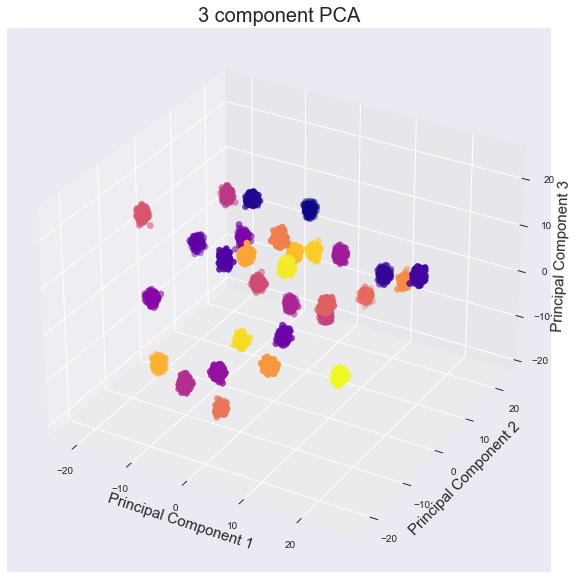

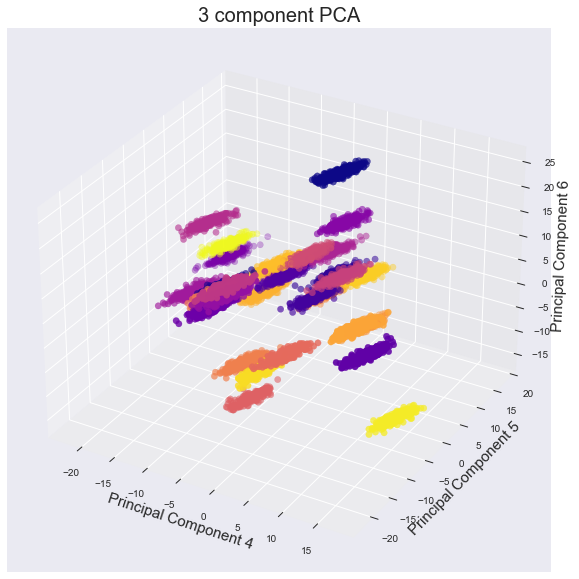

In [7]:
# Plot some stuff!
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(Z[:, 0], Z[:, 1],c=y, s=40, cmap=cm.plasma)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 4', fontsize = 15)
ax.set_ylabel('Principal Component 5', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(Z[:, 3], Z[:, 4],c=y, s=40, cmap=cm.plasma)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=y, s=40, cmap=cm.plasma)

if makeMovies:
    print("Making animation 1: ")
    rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
    writergif = animation.PillowWriter(fps=10) #gif
    rot_animation.save('pcaRotation1.gif', dpi=80,writer=writergif)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 4', fontsize = 15)
ax.set_ylabel('Principal Component 5', fontsize = 15)
ax.set_zlabel('Principal Component 6', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
ax.scatter(Z[:, 3], Z[:, 4], Z[:, 5], c=y, s=40, cmap=cm.plasma)

if makeMovies:
    print("Making animation 2:")
    rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
    writergif = animation.PillowWriter(fps=5) #gif
    rot_animation.save('pcaRotation2.gif', dpi=80,writer=writergif)

plt.show()